In [2]:
from graphviz import Digraph
from functools import wraps
from IPython.display import display

# Global variables to track the call tree
call_tree = Digraph(format='png')
node_counter = 0
parent_stack = []

from graphviz import Digraph
from functools import wraps
from IPython.display import display

# Global variables to track the call tree
call_tree = Digraph(format='png')
node_counter = 0
parent_stack = []

def visualize_call_tree(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        global node_counter, parent_stack, call_tree

        # Create a unique ID for the current node
        current_id = str(node_counter)
        node_counter += 1

        # Add the current node to the graph
        call_tree.node(current_id, label=f'{func.__name__}({args[0]})')

        # Connect to the parent node (if exists)
        if parent_stack:
            call_tree.edge(parent_stack[-1], current_id)

        # Push the current node to the parent stack
        parent_stack.append(current_id)

        # Call the original function
        result = func(*args, **kwargs)

        # Pop the current node from the parent stack
        parent_stack.pop()

        return result

    return wrapper

def generate_call_tree(func, start_arg):
    global call_tree, node_counter, parent_stack

    # Reset global variables
    call_tree = Digraph(format='png')
    node_counter = 0
    parent_stack = []

    # Wrap the function with the decorator
    wrapped_func = visualize_call_tree(func)

    # Call the function to build the call tree
    wrapped_func(start_arg)

    # Display the call tree directly in the notebook
    display(call_tree)



def visualize_call_tree_memo(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        global node_counter, parent_stack, call_tree

        # Extract the first argument (n) and the lookup dictionary
        n = args[0]
        lookup = kwargs.get('lookup', {})

        # Create a unique ID for the current node
        current_id = str(node_counter)
        node_counter += 1

        # Add the current node to the graph
        call_tree.node(current_id, label=f'{func.__name__}({n})')

        # Connect to the parent node (if exists)
        if parent_stack:
            call_tree.edge(parent_stack[-1], current_id)

        # Push the current node to the parent stack
        parent_stack.append(current_id)

        # Call the original function
        result = func(*args, **kwargs)

        # Pop the current node from the parent stack
        parent_stack.pop()

        return result

    return wrapper

def generate_call_tree_memo(func, start_arg):
    global call_tree, node_counter, parent_stack

    # Reset global variables
    call_tree = Digraph(format='png')
    node_counter = 0
    parent_stack = []

    # Wrap the function with the decorator
    wrapped_func = visualize_call_tree(func)

    # Call the function to build the call tree
    wrapped_func(start_arg, lookup={})

    # Display the call tree directly in the notebook
    display(call_tree)


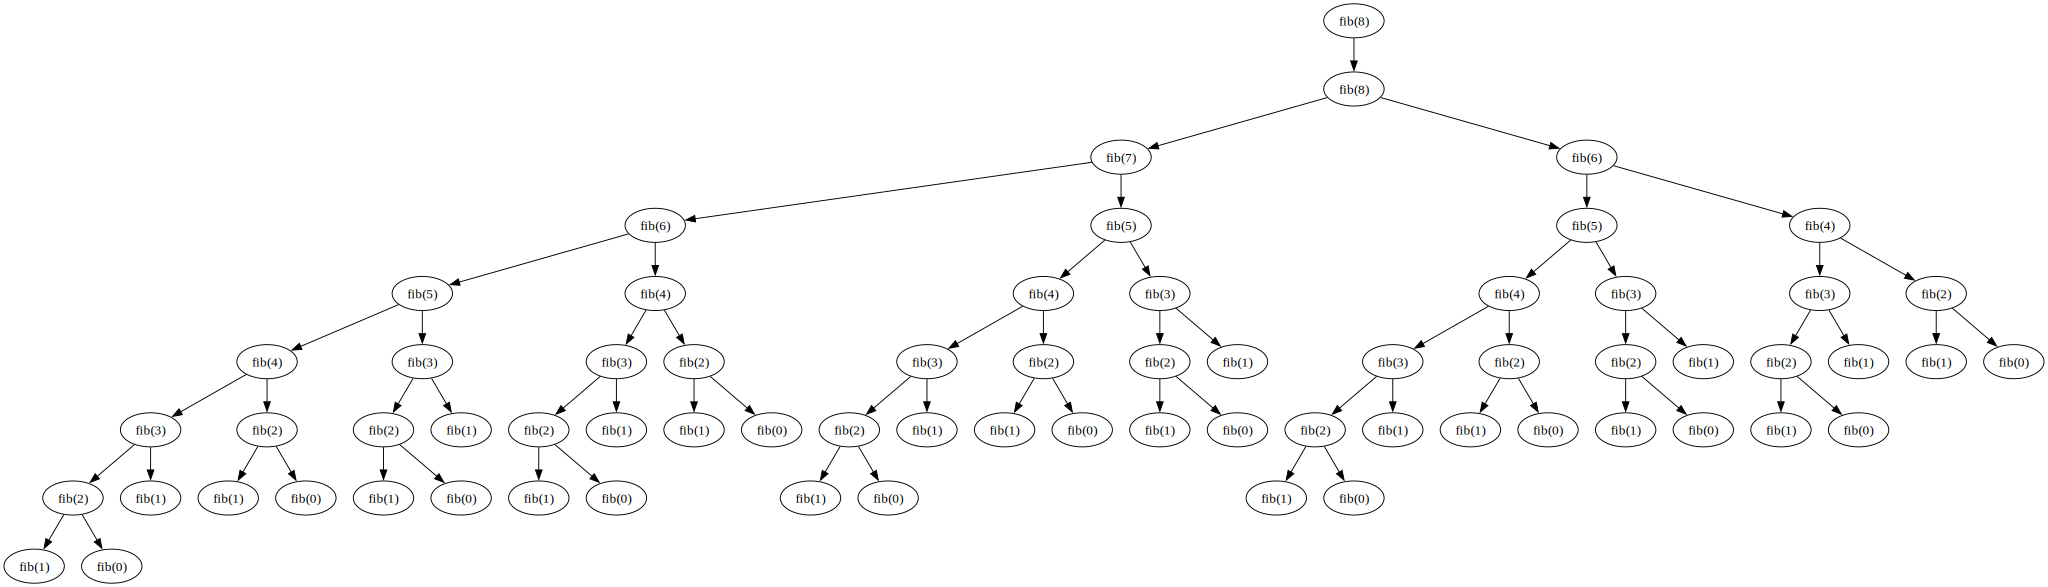

In [3]:
# Define your recursive function
@visualize_call_tree
def fib(n):
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)

# Generate and display the call tree
generate_call_tree(fib, 8)

In [4]:
def flatten(arr: list) -> list:
    """
        Recursively flattens a nested list into a single-level list.

        This function takes a list that may contain nested lists and returns a new
        list where all elements are flattened into a single level while preserving order.

        Parameters:
        ----------
        arr : list
            A list that may contain nested lists of arbitrary depth.

        Returns:
        -------
        list
            A flattened list containing all elements from the input list in order.

        Example:
        --------
        >>> flatten([1, [2, [3, 4], 5], 6])
        [1, 2, 3, 4, 5, 6]

        >>> flatten([[1, 2], [3, [4, [5, 6]]]])
        [1, 2, 3, 4, 5, 6]

        Notes:
        ------
        - The function uses recursion to handle nested lists of arbitrary depth.
        - It does not modify the original list; instead, it creates a new flattened list.
        - If `arr` contains elements that are not lists, they are directly appended to the result.
        """
    result_arr = []
    for el in arr:
        if isinstance(el, list):
            result_arr.extend(flatten(el))
        else:
            result_arr.append(el)
    return result_arr



In [ ]:
# run

In [5]:
@visualize_call_tree_memo
def get_nth_fib(n, lookup=None):
    lookup = {} if lookup is None else lookup
    if n in lookup:
        return lookup[n]
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        lookup[n] = get_nth_fib(n - 1, lookup) + get_nth_fib(n - 2, lookup)
        return lookup[n]

In [6]:
get_nth_fib(8)

21

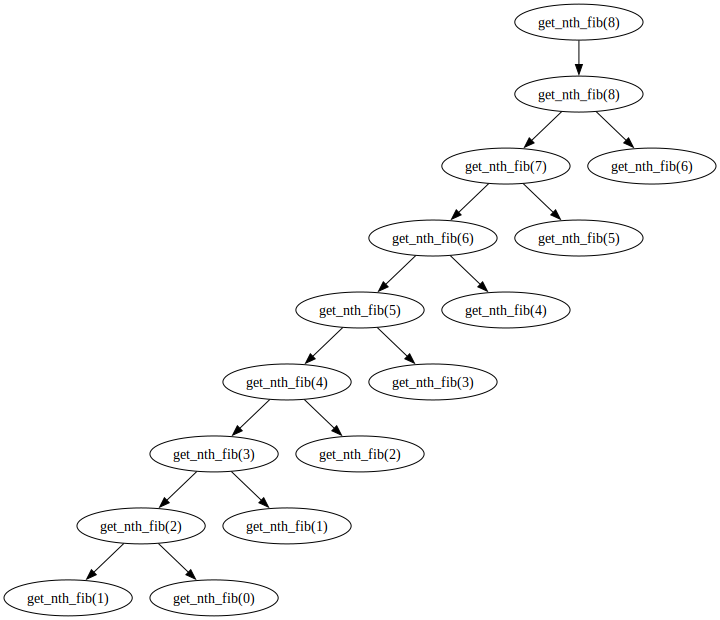

In [7]:
generate_call_tree_memo(get_nth_fib, 8)

In [ ]:
def sum_of_digits(n: int) -> int:
    """
        Recursively calculates the sum of the digits of a given integer `n`.

        This function breaks down the number by extracting the last digit (`n % 10`)
        and recursively calling itself on the remaining digits (`n // 10`) until only
        a single-digit number remains.

        Parameters:
        ----------
        n : int
            A non-negative integer whose digits will be summed.

        Returns:
        -------
        int
            The sum of all digits in `n`.

        Example:
        --------
        >>> sum_of_digits(1234)
        10  # (1 + 2 + 3 + 4)

        >>> sum_of_digits(987)
        24  # (9 + 8 + 7)

        Notes:
        ------
        - The function uses a **recursive approach** to compute the sum of digits.
        - The **base case** occurs when `n` is a single-digit number (`n < 10`).
        - An **iterative approach** also exists, is implemented in number theory module.
        - If `n` is `0`, the function correctly returns `0` as the sum.
        """
    # there is also iterative version->number theory

    if n < 10:
        return n
    else:
        return n % 10 + sum_of_digits(n // 10)

In [ ]:
sum_of_digits(432)

In [ ]:
# from AlgoExpert
def product_sum(array, depth=1):
    """
        Computes the **product sum** of a nested list, where each element is multiplied
        by its depth in the recursive structure.

        The function recursively traverses the nested list, summing elements while
        increasing the **depth multiplier** for deeper levels.

        Parameters:
        ----------
        array : list
            A list containing integers and/or nested lists of integers.
        depth : int, optional
            The current depth of recursion, used as a multiplier (default is 1).

        Returns:
        -------
        int
            The computed product sum.

        Example:
        --------
        >>> product_sum([1, 2, [3, 4], 5])
        22  # (1 + 2 + (3 + 4) * 2 + 5)

        >>> product_sum([1, [2, [3, 4], 5]])
        27  # (1 + (2 + (3 + 4) * 3 + 5) * 2)

        >>> product_sum([[[1, 2], 3], 4])
        19  # (((1 + 2) * 3 + 3) * 2 + 4)

        Notes:
        ------
        - Each **nested level** increases the depth multiplier by `1`.
        - The **base case** occurs when an element is an integer.
        - Uses **recursion** to handle arbitrary levels of nesting.
        - The function correctly accumulates `total_sum` rather than overwriting it.
        """
    total_sum = 0
    for el in array:
        if isinstance(el, list):
            total_sum += product_sum(el, depth + 1)
        else:
            total_sum += el
    return total_sum * depth

In [ ]:

def number_of_divisors(n: int, count=0, i=1) -> int:
    """
        Recursively calculates the number of divisors of a given integer `n`.

        This function iterates through all numbers from `1` to `n` to count how many
        of them divide `n` without a remainder using a recursive approach.

        Parameters:
        ----------
        n : int
            The number for which divisors are counted.
        count : int, optional
            The current count of divisors (default is 0).
        i : int, optional
            The current number being checked as a potential divisor (default is 1).

        Returns:
        -------
        int
            The total count of divisors of `n`.

        Example:
        --------
        >>> number_of_divisors(6)
        4

        >>> number_of_divisors(10)
        4

        Notes:
        ------
        - The function correctly increments `i` to progress through all numbers up to `n`.
        - This implementation uses recursion, which may result in a **stack overflow** for very large values of `n`.
        - An **iterative approach** may be more efficient in practice.
        """
    print(f"Calling number_of_divisors(n={n}, count={count}, i={i})")  # Log function entry
    if i > n:
        print(f"Base case reached! Returning count={count}")  # Log base case
        return count
    else:
        if n % i == 0:
            count += 1
            print(f"Divisor found: {i}, updated count={count}")
        i += 1  # increment index for next call
    return number_of_divisors(n, count, i)

In [ ]:
number_of_divisors(23)

# Permutations with memo.
This comes from AlgoExpert. Be carefull becasue they require to return empty array.
### Recursive logic
The function iterates over each element in arr, generates permutations of the remaining elements, and appends the current element to each permutation.

In [8]:
@visualize_call_tree_memo
def permutations(arr: list,lookup=None) -> list:
    # Top-level check for empty input
    if lookup is None and not arr:
        return []

    # Initialize lookup if not provided
    if lookup is None:
        lookup = {}

    # Convert list to tuple for hashing
    arr_tuple = tuple(arr)

    # Base case: return a list containing an empty list
    if not arr:
        return [[]]

    # Return cached result if available
    if arr_tuple in lookup:
        return lookup[arr_tuple]

    # Generate permutations
    results = []
    for i in range(len(arr)):
        curr_el = arr[i]
        remaining = arr[:i] + arr[i + 1:]  # Exclude the current element
        for p in permutations(remaining, lookup):  # Recursive call
            results.append([curr_el] + p)  # Build permutations

    # Cache the result
    lookup[arr_tuple] = results
    return results

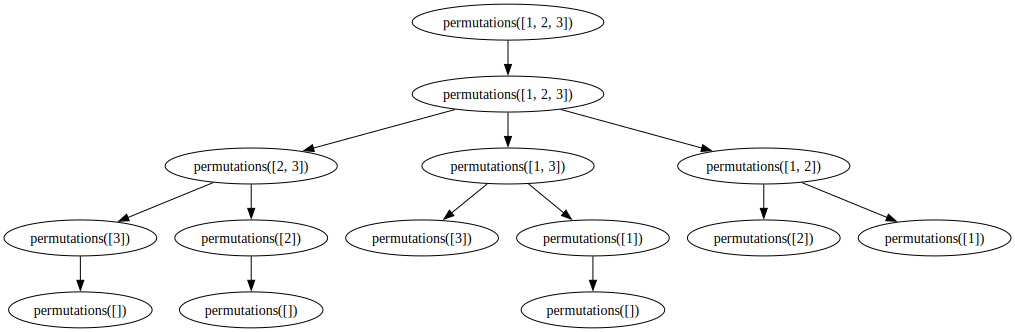

In [11]:
generate_call_tree_memo(permutations, [1,2,3])